In [5]:
import numpy as np
import pandas as pd

In [6]:
link_rev = pd.read_csv("C:\\Users\\Shree\\Downloads\\linkedin-reviews.csv")

In [7]:
link_rev.head(2)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1


In [8]:
link_rev['Rating'].value_counts()

Rating
1    275
4    122
3    121
5     95
2     89
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explolatory Data Analysis

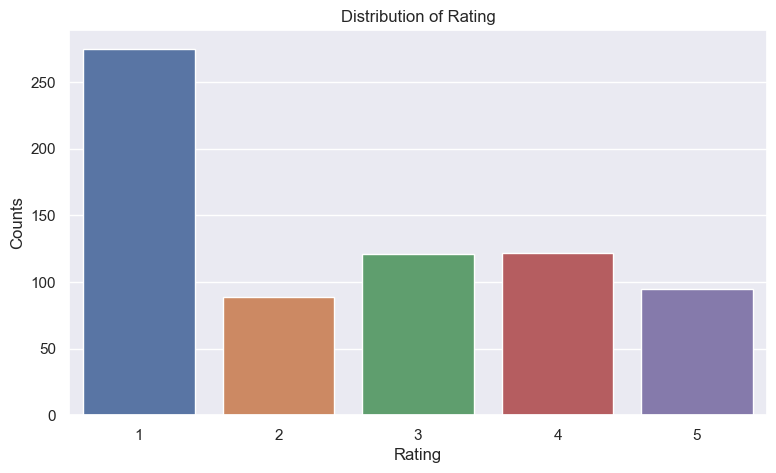

In [23]:
#plotting the distribution of rating
sns.set(style = 'darkgrid')
plt.figure(figsize=(9,5))
sns.countplot(data = link_rev,
             x= 'Rating')
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()

# Now we will analyze the length of the reviews , as this can sometimes correlate with the sentiment or detail of feedback . We will first calculate the length of each review and the visualize the data .

In [25]:
link_rev["Review Length"]=link_rev['Review'].apply(len)

In [26]:
link_rev.head(2)

,Review,Rating,Review Length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23


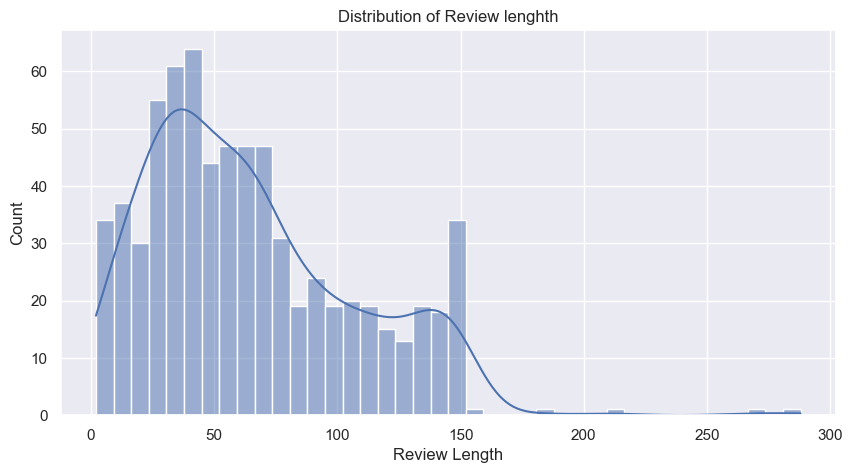

In [36]:
#plotting the distribution of review lenghts
plt.figure(figsize = (10,5))
sns.histplot(link_rev['Review Length'] , bins =40,kde = True)
plt.title("Distribution of Review lenghth")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()

# Adding Sentiment Labels in the Data
We will use Textblob library. Textblob library provides a polarity score raning from -1(very negative) to +1(very positive) for a given text . We can use this score to classify each review's sentiment as positive, negative or neutral.

!pip install textblob

In [40]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     -- ---------------------------------- 41.0/636.8 kB 196.9 kB/s eta 0:00:04
     -- ---------------------------------- 41.0/636.8 kB 196.9 kB/s eta 0:00:04
     --- --------------------------------- 61.4/636.8 kB 204.8 kB/s eta 0:00:03
     --- --------------------------------- 61.4/636.8 kB 204.8 kB/s eta 0:00:03
     --- --------------------------------- 61.4/636.8 kB 204.8 kB/s eta 0:00:03
     -------- --------------------------- 143.4/636.8 kB 316.2 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 316.2 kB/s eta 0:00:02
     -------- --------------------------- 153.6/636.8 kB 286.7 kB/s eta 0:00:02
     -------- --------------------------- 153.6

In [41]:
!python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [42]:
from textblob import TextBlob

In [43]:
def sentiment_analysis(Review):
    sentiment = TextBlob(Review).sentiment
    if sentiment.polarity >0.1:
        return "Positive"
    elif sentiment.polarity < -0.1 :
        return "Negative"
    else :
        return "Neutral"

In [46]:
link_rev['Sentiments'] = link_rev["Review"].apply(sentiment_analysis)

In [47]:
link_rev.head(2)

,Review,Rating,Review Length,Sentiments
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral


# Analyzing App review sentiment

In [50]:
sentiment_distribution = link_rev["Sentiments"].value_counts()


In [52]:
sentiment_distribution

Sentiments
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

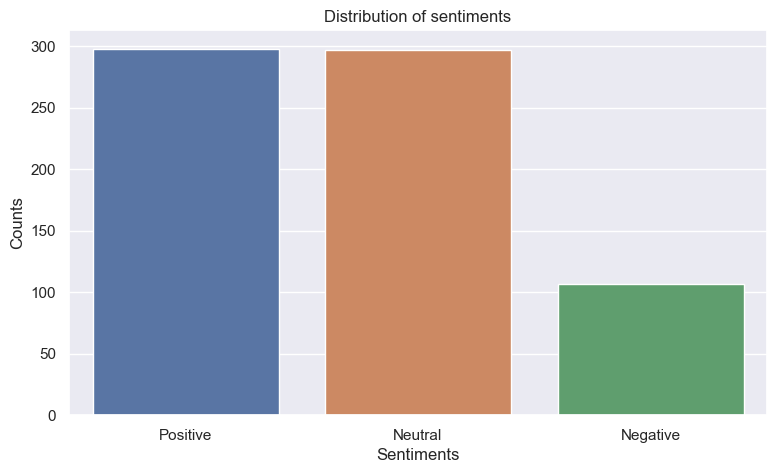

In [59]:
#plotting distribution of sentiments
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title("Distribution of sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()

# So, we can see although the app has low ratings , still the reviewers don't use many negative words in the reviews for the app .

# Now , we will explore the relationship between the sentiments and the ratings . This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical ratings .

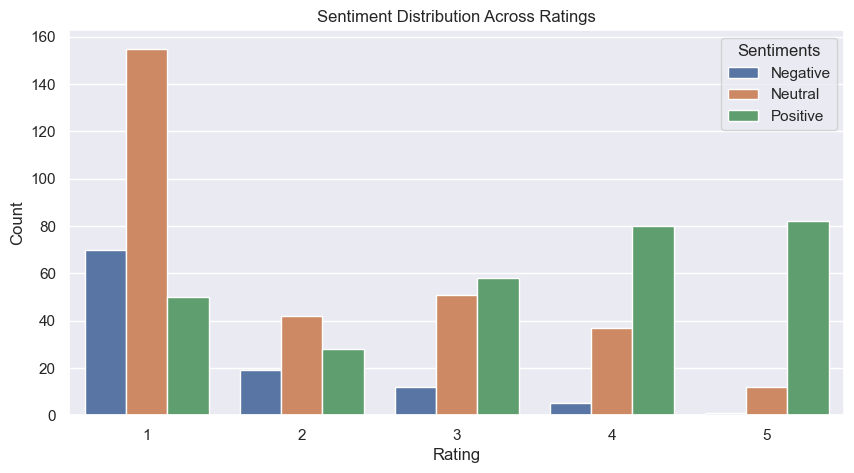

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(data = link_rev,
             x="Rating",
             hue="Sentiments")
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiments')
plt.show()

# Summary
So , App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback , prioritze feature updates , and maintain a positive user community .